<a href="https://colab.research.google.com/github/DiwakarBasnet/Neural_Network/blob/main/Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Steps to build a neural network using Keras
1. Loading the dataset
2. Data Preprocessing
3. Creating training and validation set
4. Defining the architecture of the model
5. Compiling the model(defining loss function, optimizer)
6. Training the model
7. Evaluating model performance on training and validation set

## 1.Loading the dataset

In [ ]:
# importing required libraries
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# reading the dataset
#github url of loan_data = https://raw.githubusercontent.com/DiwakarBasnet/Neural_Network/main/Data/loan_data.csv
#github url of normalized_data = https://raw.githubusercontent.com/DiwakarBasnet/Neural_Network/main/Data/normalized_loan.csv
dataset = pd.read_csv('loan_data.csv')

## 2.Data Preprocessing

In [ ]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
dataset.shape

(614, 13)

In [ ]:
# checking missing values in the table
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
dataset.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

### I.Filling the missing values



Categorical Data: Mode

In [ ]:
# filling missing values of categorical variables with mode
dataset['Gender'].fillna(dataset['Gender'].mode()[0], inplace=True)
dataset['Married'].fillna(dataset['Married'].mode()[0], inplace=True)
dataset['Dependents'].fillna(dataset['Dependents'].mode()[0], inplace=True)
dataset['Self_Employed'].fillna(dataset['Self_Employed'].mode()[0], inplace=True)
dataset['Loan_Amount_Term'].fillna(dataset['Loan_Amount_Term'].mode()[0], inplace=True)
dataset['Credit_History'].fillna(dataset['Credit_History'].mode()[0], inplace=True)

Continuous Data: Mean

In [ ]:
# filling missing values of continuous variables with mean
dataset['LoanAmount'].fillna(dataset['LoanAmount'].mean(), inplace=True)

In [ ]:
# checking missing values after imputation
dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### II.Converting categories to numbers

In [ ]:
# converting the categories into numbers using map function
dataset['Gender'] = dataset['Gender'].map({'Male': 0, 'Female': 1})
dataset['Married'] = dataset['Married'].map({'No': 0, 'Yes':1})
dataset['Dependents'] = dataset['Dependents'].map({'0': 0, '1': 1, '2': 2, '3+': 3})
dataset['Self_Employed'] = dataset['Self_Employed'].map({'No': 0, 'Yes': 1})
dataset['Education'] = dataset['Education'].map({'Not Graduate': 0, 'Graduate': 1})
dataset['Property_Area'] = dataset['Property_Area'].map({'Rural': 0, 'Semiurban': 1, 'Urban': 2})
dataset['Loan_Status'] = dataset['Loan_Status'].map({'N':0, 'Y': 1})

In [ ]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,0,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,0,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,0,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,0,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1


### III.Normalization

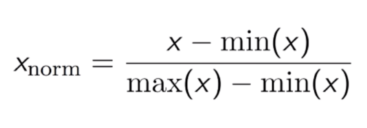

In [ ]:
# bringing the variables in the range of 0 to 1
for i in dataset.columns[1:]:
  dataset[i] = (dataset[i] - dataset[i].min()) / (dataset[i].max() - dataset[i].min()) 

In [ ]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.0,0.0,0.000000,1.0,0.0,0.070489,0.000000,0.198860,0.74359,1.0,1.0,1.0
1,LP001003,0.0,1.0,0.333333,1.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0,0.0
2,LP001005,0.0,1.0,0.000000,1.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0,1.0,1.0
3,LP001006,0.0,1.0,0.000000,0.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,1.0,1.0
4,LP001008,0.0,0.0,0.000000,1.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,1.0,1.0


In [ ]:
dataset.to_csv('normalized_loan.csv', index=False)

In [ ]:
# reading normalized data
data = pd.read_csv('normalized_loan.csv')

In [ ]:
# removing Loan_ID
data = data.drop('Loan_ID', axis=1)
data.shape

(614, 12)

In [ ]:
# separating the independent and dependent variables
# storing all the independent variables or features as X
X = data.drop('Loan_Status', axis=1)
# storing all the dependent variables or target as y
y = data['Loan_Status']

In [ ]:
# shape of independent and dependent variables
X.shape, y.shape

((614, 11), (614,))

## 3.Creating training and validation set

In [ ]:
# stratify will make sure that distribution of calsses in train and validation set is similar
# random state to regenerate the same train and validation set
# test size 0.2 will keep 20% data in validation and remaining 80% in train set
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=data['Loan_Status'],random_state=10,test_size=0.2)

# shape of training and validation set
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((491, 11), (491,)), ((123, 11), (123,)))

## 4.Defining the architecture of the model

In [ ]:
# importing keras for model building and model training
import keras
# importing tenserflow since keras uses it in backend
import tensorflow as tf

In [ ]:
# importing sequential model from keras
from keras.models import Sequential 
# importing different layers from keras
from keras.layers import InputLayer, Dense

In [ ]:
# since loan prediction is binary classification problem we will have single neuron in output layer
# hidden layers and hidden neurons are hyperparameters so we can choose them on our own

In [ ]:
# defining input neurons
input_neurons = X_train.shape[1]
# defining output neurons
output_neurons = 1
# define hidden layers and neuron in each layer
num_of_hidden_layers = 2
neuron_hidden_layer_1 = 10
neuron_hidden_layer_2 = 5

In [ ]:
# activation function of different layers
# for now relu is choosen as an activation function for hidden layers
# since it is a binary classification problem, sigmoid activation function is choosen for final layer

In [ ]:
from logging import INFO
# defining the architecture of the model
model = Sequential()
model.add(InputLayer(input_shape=(input_neurons,)))
model.add(Dense(units=neuron_hidden_layer_1, activation='relu'))
model.add(Dense(units=neuron_hidden_layer_2, activation='relu'))
model.add(Dense(units=output_neurons, activation='sigmoid'))

In [ ]:
# summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                120       
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


## 5.Compiling the model(defining loss function, optimizer)

In [ ]:
# loss as binary_crossentropy, since we have binary classification problem
# definig the optimizer as Adam
# evaluation metric as accuracy
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

## 6.Training the model

In [ ]:
# storing the trained model in model_history variable
# epochs means number of times model is going through a training set
model_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

Epoch 1/50
16/16 [==============================] - 2s 25ms/step - loss: 0.7694 - accuracy: 0.2424 - val_loss: 0.7348 - val_accuracy: 0.2683
Epoch 2/50
16/16 [==============================] - 0s 4ms/step - loss: 0.7190 - accuracy: 0.3279 - val_loss: 0.6919 - val_accuracy: 0.5854
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6792 - accuracy: 0.6008 - val_loss: 0.6556 - val_accuracy: 0.6829
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6502 - accuracy: 0.6762 - val_loss: 0.6330 - val_accuracy: 0.6911
Epoch 5/50
16/16 [==============================] - 0s 4ms/step - loss: 0.6328 - accuracy: 0.6864 - val_loss: 0.6187 - val_accuracy: 0.6911
Epoch 6/50
16/16 [==============================] - 0s 4ms/step - loss: 0.6196 - accuracy: 0.6864 - val_loss: 0.6085 - val_accuracy: 0.6911
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6084 - accuracy: 0.6864 - val_loss: 0.5998 - val_accuracy: 0.6911
Epoch 8/50
16/16 [=

## 7.Evaluating model performance on validation set

In [ ]:
# getting prediction for the validation set

# for multi-class classification:
# predict = model.predict(X_test)
# prediction = np.argmax(predict, axis=1)

# for binary-class classification:
prediction = (model.predict(X_test) > 0.5).astype("int32")

# calculating the accuracy on validation set
accuracy_score(y_test, prediction)

0.8130081300813008

### Visualizing model prediction

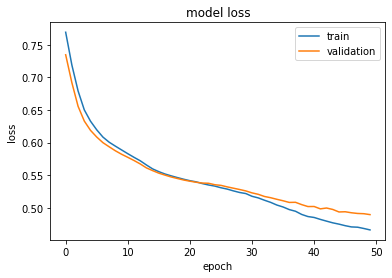

In [ ]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

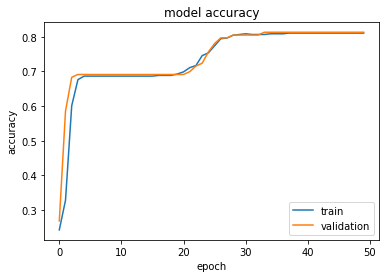

In [ ]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()